In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [24]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [4]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [7]:
gross_tem = df_gross[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]

In [9]:
gross_tem_oneValue = gross_tem[['T5']]

In [10]:
gross_tem_oneValue

,T5
0,24.4490
1,24.4152
2,24.4490
3,24.3813
4,24.5843
...,...
1291,24.4828
1292,24.4490
1293,24.5843
1294,24.7872


/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fadb13a9490>)

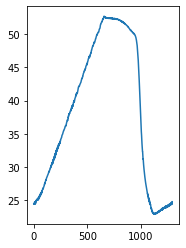

In [11]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    #df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(gross_tem_oneValue, ax, fig, alpha =0.7, scm=None)

In [12]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm_dis, scaler = normalize(gross_tem_oneValue)
df_nrm_dis = pd.DataFrame(df_nrm_dis)
#df_nrm.columns = chargingIn_df.columns

df_nrm_dis.columns = ['T']
df_nrm_dis

,T
0,0.051096
1,0.049961
2,0.051096
3,0.048823
4,0.055640
...,...
1291,0.052231
1292,0.051096
1293,0.055640
1294,0.062453


In [13]:
k =3
n_features = 1
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 50

In [14]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [16]:

Xdf1, ydf1 = prepare_df(df_nrm_dis)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(1293, 3)

In [17]:
ydf1.shape

(1293, 1)

In [18]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)

    #plt.legend(loc='upper left')
    return fig, ax


In [19]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [20]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [21]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [32]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(16, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [33]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyOneTemT.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [27]:
X_train.shape
#y_train.shape

(1163, 3)

In [31]:
k =3
n_features = 1
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 50

In [34]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)
ax.legend(bbox_to_anchor=(0.5,0.8))

Train on 814 samples, validate on 349 samples
Epoch 1/5000
814/814 [==============================] - 1s 2ms/step - loss: 0.8597 - accuracy: 0.0000e+00 - val_loss: 0.4610 - val_accuracy: 0.0201
Epoch 2/5000
814/814 [==============================] - 0s 199us/step - loss: 0.6437 - accuracy: 0.0000e+00 - val_loss: 0.3816 - val_accuracy: 0.0201
Epoch 3/5000
814/814 [==============================] - 0s 288us/step - loss: 0.4807 - accuracy: 0.0000e+00 - val_loss: 0.3303 - val_accuracy: 0.0201
Epoch 4/5000
814/814 [==============================] - 0s 345us/step - loss: 0.3642 - accuracy: 0.0025 - val_loss: 0.3050 - val_accuracy: 0.0201
Epoch 5/5000
814/814 [==============================] - 0s 244us/step - loss: 0.3037 - accuracy: 0.0025 - val_loss: 0.2929 - val_accuracy: 0.0201
Epoch 6/5000
814/814 [==============================] - 0s 230us/step - loss: 0.2775 - accuracy: 0.0012 - val_loss: 0.2784 - val_accuracy: 0.0201
Epoch 7/5000
814/814 [==============================] - 0s 223us/ste

814/814 [==============================] - 0s 206us/step - loss: 0.0388 - accuracy: 0.0025 - val_loss: 0.0310 - val_accuracy: 0.0201
Epoch 57/5000
814/814 [==============================] - 0s 193us/step - loss: 0.0383 - accuracy: 0.0025 - val_loss: 0.0302 - val_accuracy: 0.0201
Epoch 58/5000
814/814 [==============================] - 0s 244us/step - loss: 0.0381 - accuracy: 0.0025 - val_loss: 0.0292 - val_accuracy: 0.0201
Epoch 59/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0353 - accuracy: 0.0025 - val_loss: 0.0280 - val_accuracy: 0.0201
Epoch 60/5000
814/814 [==============================] - 0s 179us/step - loss: 0.0352 - accuracy: 0.0025 - val_loss: 0.0279 - val_accuracy: 0.0201
Epoch 61/5000
814/814 [==============================] - 0s 219us/step - loss: 0.0336 - accuracy: 0.0025 - val_loss: 0.0261 - val_accuracy: 0.0201
Epoch 62/5000
814/814 [==============================] - 0s 130us/step - loss: 0.0337 - accuracy: 0.0025 - val_loss: 0.0252 - val_ac

Epoch 112/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0156 - accuracy: 0.0025 - val_loss: 0.0106 - val_accuracy: 0.0201
Epoch 113/5000
814/814 [==============================] - 0s 149us/step - loss: 0.0154 - accuracy: 0.0025 - val_loss: 0.0106 - val_accuracy: 0.0201
Epoch 114/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0154 - accuracy: 0.0025 - val_loss: 0.0109 - val_accuracy: 0.0201
Epoch 115/5000
814/814 [==============================] - 0s 138us/step - loss: 0.0159 - accuracy: 0.0025 - val_loss: 0.0104 - val_accuracy: 0.0201
Epoch 116/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0153 - accuracy: 0.0025 - val_loss: 0.0104 - val_accuracy: 0.0201
Epoch 117/5000
814/814 [==============================] - 0s 146us/step - loss: 0.0148 - accuracy: 0.0025 - val_loss: 0.0104 - val_accuracy: 0.0201
Epoch 118/5000
814/814 [==============================] - 0s 168us/step - loss: 0.0139 - accuracy: 0.0025 - val_

814/814 [==============================] - 0s 185us/step - loss: 0.0107 - accuracy: 0.0025 - val_loss: 0.0077 - val_accuracy: 0.0201
Epoch 168/5000
814/814 [==============================] - 0s 165us/step - loss: 0.0106 - accuracy: 0.0025 - val_loss: 0.0077 - val_accuracy: 0.0201
Epoch 169/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0107 - accuracy: 0.0025 - val_loss: 0.0075 - val_accuracy: 0.0201
Epoch 170/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0107 - accuracy: 0.0025 - val_loss: 0.0080 - val_accuracy: 0.0201
Epoch 171/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0103 - accuracy: 0.0025 - val_loss: 0.0079 - val_accuracy: 0.0201
Epoch 172/5000
814/814 [==============================] - 0s 149us/step - loss: 0.0110 - accuracy: 0.0025 - val_loss: 0.0078 - val_accuracy: 0.0201
Epoch 173/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0106 - accuracy: 0.0025 - val_loss: 0.0072 - 

814/814 [==============================] - 0s 216us/step - loss: 0.0084 - accuracy: 0.0025 - val_loss: 0.0064 - val_accuracy: 0.0201
Epoch 223/5000
814/814 [==============================] - 0s 199us/step - loss: 0.0088 - accuracy: 0.0025 - val_loss: 0.0060 - val_accuracy: 0.0201
Epoch 224/5000
814/814 [==============================] - 0s 195us/step - loss: 0.0086 - accuracy: 0.0025 - val_loss: 0.0064 - val_accuracy: 0.0201
Epoch 225/5000
814/814 [==============================] - 0s 204us/step - loss: 0.0084 - accuracy: 0.0025 - val_loss: 0.0064 - val_accuracy: 0.0201
Epoch 226/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0088 - accuracy: 0.0025 - val_loss: 0.0061 - val_accuracy: 0.0201
Epoch 227/5000
814/814 [==============================] - 0s 196us/step - loss: 0.0088 - accuracy: 0.0025 - val_loss: 0.0063 - val_accuracy: 0.0201
Epoch 228/5000
814/814 [==============================] - 0s 221us/step - loss: 0.0084 - accuracy: 0.0025 - val_loss: 0.0066 - 

814/814 [==============================] - 0s 279us/step - loss: 0.0071 - accuracy: 0.0025 - val_loss: 0.0050 - val_accuracy: 0.0201
Epoch 278/5000
814/814 [==============================] - 0s 231us/step - loss: 0.0073 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0201
Epoch 279/5000
814/814 [==============================] - 0s 215us/step - loss: 0.0070 - accuracy: 0.0025 - val_loss: 0.0048 - val_accuracy: 0.0201
Epoch 280/5000
814/814 [==============================] - 0s 180us/step - loss: 0.0075 - accuracy: 0.0025 - val_loss: 0.0051 - val_accuracy: 0.0201
Epoch 281/5000
814/814 [==============================] - 0s 185us/step - loss: 0.0068 - accuracy: 0.0025 - val_loss: 0.0048 - val_accuracy: 0.0201
Epoch 282/5000
814/814 [==============================] - 0s 185us/step - loss: 0.0073 - accuracy: 0.0025 - val_loss: 0.0049 - val_accuracy: 0.0201
Epoch 283/5000
814/814 [==============================] - 0s 219us/step - loss: 0.0068 - accuracy: 0.0025 - val_loss: 0.0048 - 

814/814 [==============================] - 0s 228us/step - loss: 0.0060 - accuracy: 0.0025 - val_loss: 0.0040 - val_accuracy: 0.0201
Epoch 333/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0063 - accuracy: 0.0025 - val_loss: 0.0046 - val_accuracy: 0.0201
Epoch 334/5000
814/814 [==============================] - 0s 209us/step - loss: 0.0060 - accuracy: 0.0025 - val_loss: 0.0042 - val_accuracy: 0.0201
Epoch 335/5000
814/814 [==============================] - 0s 207us/step - loss: 0.0057 - accuracy: 0.0025 - val_loss: 0.0036 - val_accuracy: 0.0201
Epoch 336/5000
814/814 [==============================] - 0s 336us/step - loss: 0.0061 - accuracy: 0.0025 - val_loss: 0.0040 - val_accuracy: 0.0201
Epoch 337/5000
814/814 [==============================] - 0s 395us/step - loss: 0.0063 - accuracy: 0.0025 - val_loss: 0.0035 - val_accuracy: 0.0201
Epoch 338/5000
814/814 [==============================] - 0s 199us/step - loss: 0.0062 - accuracy: 0.0025 - val_loss: 0.0035 - 

814/814 [==============================] - 0s 288us/step - loss: 0.0056 - accuracy: 0.0025 - val_loss: 0.0032 - val_accuracy: 0.0201
Epoch 388/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0055 - accuracy: 0.0025 - val_loss: 0.0031 - val_accuracy: 0.0201
Epoch 389/5000
814/814 [==============================] - 0s 195us/step - loss: 0.0054 - accuracy: 0.0025 - val_loss: 0.0029 - val_accuracy: 0.0201
Epoch 390/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0053 - accuracy: 0.0025 - val_loss: 0.0031 - val_accuracy: 0.0201
Epoch 391/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0052 - accuracy: 0.0025 - val_loss: 0.0030 - val_accuracy: 0.0201
Epoch 392/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0054 - accuracy: 0.0025 - val_loss: 0.0037 - val_accuracy: 0.0201
Epoch 393/5000
814/814 [==============================] - 0s 188us/step - loss: 0.0053 - accuracy: 0.0025 - val_loss: 0.0032 - 

814/814 [==============================] - 0s 198us/step - loss: 0.0046 - accuracy: 0.0025 - val_loss: 0.0026 - val_accuracy: 0.0201
Epoch 443/5000
814/814 [==============================] - 0s 204us/step - loss: 0.0049 - accuracy: 0.0025 - val_loss: 0.0028 - val_accuracy: 0.0201
Epoch 444/5000
814/814 [==============================] - 0s 210us/step - loss: 0.0050 - accuracy: 0.0025 - val_loss: 0.0025 - val_accuracy: 0.0201
Epoch 445/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0050 - accuracy: 0.0025 - val_loss: 0.0025 - val_accuracy: 0.0201
Epoch 446/5000
814/814 [==============================] - 0s 201us/step - loss: 0.0049 - accuracy: 0.0025 - val_loss: 0.0023 - val_accuracy: 0.0201
Epoch 447/5000
814/814 [==============================] - 0s 205us/step - loss: 0.0053 - accuracy: 0.0025 - val_loss: 0.0028 - val_accuracy: 0.0201
Epoch 448/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0049 - accuracy: 0.0025 - val_loss: 0.0033 - 

814/814 [==============================] - 0s 209us/step - loss: 0.0045 - accuracy: 0.0025 - val_loss: 0.0029 - val_accuracy: 0.0201
Epoch 498/5000
814/814 [==============================] - 0s 206us/step - loss: 0.0045 - accuracy: 0.0025 - val_loss: 0.0022 - val_accuracy: 0.0201
Epoch 499/5000
814/814 [==============================] - 0s 180us/step - loss: 0.0045 - accuracy: 0.0025 - val_loss: 0.0020 - val_accuracy: 0.0201
Epoch 500/5000
814/814 [==============================] - 0s 188us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 0.0024 - val_accuracy: 0.0201
Epoch 501/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0043 - accuracy: 0.0025 - val_loss: 0.0023 - val_accuracy: 0.0201
Epoch 502/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0020 - val_accuracy: 0.0201
Epoch 503/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 0.0020 - 

814/814 [==============================] - 0s 269us/step - loss: 0.0042 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0201
Epoch 553/5000
814/814 [==============================] - 0s 245us/step - loss: 0.0042 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 554/5000
814/814 [==============================] - 0s 259us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0020 - val_accuracy: 0.0201
Epoch 555/5000
814/814 [==============================] - 0s 244us/step - loss: 0.0043 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 556/5000
814/814 [==============================] - 0s 247us/step - loss: 0.0043 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 557/5000
814/814 [==============================] - 0s 244us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0022 - val_accuracy: 0.0201
Epoch 558/5000
814/814 [==============================] - 0s 210us/step - loss: 0.0042 - accuracy: 0.0025 - val_loss: 0.0016 - 

814/814 [==============================] - 0s 291us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 608/5000
814/814 [==============================] - 0s 206us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0022 - val_accuracy: 0.0201
Epoch 609/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0201
Epoch 610/5000
814/814 [==============================] - 0s 214us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 611/5000
814/814 [==============================] - 0s 214us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0201
Epoch 612/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0020 - val_accuracy: 0.0201
Epoch 613/5000
814/814 [==============================] - 0s 226us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0015 - 

814/814 [==============================] - 1s 665us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 663/5000
814/814 [==============================] - 0s 346us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0201
Epoch 664/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 665/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 666/5000
814/814 [==============================] - 0s 371us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 667/5000
814/814 [==============================] - 0s 291us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0201
Epoch 668/5000
814/814 [==============================] - 0s 204us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0012 - 

814/814 [==============================] - 0s 242us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0201
Epoch 718/5000
814/814 [==============================] - 0s 199us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 719/5000
814/814 [==============================] - 0s 146us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 720/5000
814/814 [==============================] - 0s 206us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0201
Epoch 721/5000
814/814 [==============================] - 0s 205us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 9.2898e-04 - val_accuracy: 0.0201
Epoch 722/5000
814/814 [==============================] - 0s 200us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 723/5000
814/814 [==============================] - 0s 202us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.001

814/814 [==============================] - 0s 218us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 773/5000
814/814 [==============================] - 0s 210us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 774/5000
814/814 [==============================] - 0s 227us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 775/5000
814/814 [==============================] - 0s 211us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 776/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 777/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 778/5000
814/814 [==============================] - 0s 201us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0014 - 

814/814 [==============================] - 0s 247us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 828/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.5980e-04 - val_accuracy: 0.0201
Epoch 829/5000
814/814 [==============================] - 0s 308us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 830/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.5839e-04 - val_accuracy: 0.0201
Epoch 831/5000
814/814 [==============================] - 0s 243us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 832/5000
814/814 [==============================] - 0s 269us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 8.0811e-04 - val_accuracy: 0.0201
Epoch 833/5000
814/814 [==============================] - 0s 231us/step - loss: 0.0039 - accuracy: 0.0025 - val_los

Epoch 882/5000
814/814 [==============================] - 0s 306us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 883/5000
814/814 [==============================] - 0s 226us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 884/5000
814/814 [==============================] - 0s 283us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 885/5000
814/814 [==============================] - 0s 291us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 886/5000
814/814 [==============================] - 0s 308us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 887/5000
814/814 [==============================] - 0s 184us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 888/5000
814/814 [==============================] - 0s 225us/step - loss: 0.0034 - accuracy: 0.0025 - val_

Epoch 937/5000
814/814 [==============================] - 0s 354us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0201
Epoch 938/5000
814/814 [==============================] - 0s 225us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.8338e-04 - val_accuracy: 0.0201
Epoch 939/5000
814/814 [==============================] - 0s 262us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.6742e-04 - val_accuracy: 0.0201
Epoch 940/5000
814/814 [==============================] - 0s 234us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 941/5000
814/814 [==============================] - 0s 241us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 942/5000
814/814 [==============================] - 0s 259us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.7475e-04 - val_accuracy: 0.0201
Epoch 943/5000
814/814 [==============================] - 0s 220us/step - loss: 0.0032 - accuracy: 0

814/814 [==============================] - 0s 262us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 992/5000
814/814 [==============================] - 0s 274us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.8721e-04 - val_accuracy: 0.0201
Epoch 993/5000
814/814 [==============================] - 0s 284us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 994/5000
814/814 [==============================] - 0s 244us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 6.2232e-04 - val_accuracy: 0.0201
Epoch 995/5000
814/814 [==============================] - 0s 205us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 996/5000
814/814 [==============================] - 0s 252us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.1213e-04 - val_accuracy: 0.0201
Epoch 997/5000
814/814 [==============================] - 0s 242us/step - loss: 0.0033 - accuracy: 0.0025 - val_los

814/814 [==============================] - 0s 284us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.3315e-04 - val_accuracy: 0.0201
Epoch 1046/5000
814/814 [==============================] - 0s 288us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.5393e-04 - val_accuracy: 0.0201
Epoch 1047/5000
814/814 [==============================] - 0s 227us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 1048/5000
814/814 [==============================] - 0s 221us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.4531e-04 - val_accuracy: 0.0201
Epoch 1049/5000
814/814 [==============================] - 0s 233us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 1050/5000
814/814 [==============================] - 0s 303us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.2389e-04 - val_accuracy: 0.0201
Epoch 1051/5000
814/814 [==============================] - 0s 224us/step - loss: 0.0032 - accuracy: 0.0025

814/814 [==============================] - 0s 221us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.9058e-04 - val_accuracy: 0.0201
Epoch 1100/5000
814/814 [==============================] - 0s 225us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 1101/5000
814/814 [==============================] - 0s 204us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.3458e-04 - val_accuracy: 0.0201
Epoch 1102/5000
814/814 [==============================] - 0s 248us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 1103/5000
814/814 [==============================] - 0s 295us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1104/5000
814/814 [==============================] - 0s 297us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.6321e-04 - val_accuracy: 0.0201
Epoch 1105/5000
814/814 [==============================] - 0s 304us/step - loss: 0.0033 - accuracy: 0.0025 - v

814/814 [==============================] - 0s 226us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1154/5000
814/814 [==============================] - 0s 202us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.6317e-04 - val_accuracy: 0.0201
Epoch 1155/5000
814/814 [==============================] - 0s 234us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1156/5000
814/814 [==============================] - 0s 182us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 1157/5000
814/814 [==============================] - 0s 226us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 1158/5000
814/814 [==============================] - 0s 200us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.2182e-04 - val_accuracy: 0.0201
Epoch 1159/5000
814/814 [==============================] - 0s 269us/step - loss: 0.0034 - accuracy: 0.0025 - val_l

814/814 [==============================] - 0s 225us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 9.6587e-04 - val_accuracy: 0.0201
Epoch 1208/5000
814/814 [==============================] - 0s 220us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.0186e-04 - val_accuracy: 0.0201
Epoch 1209/5000
814/814 [==============================] - 0s 202us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.7019e-04 - val_accuracy: 0.0201
Epoch 1210/5000
814/814 [==============================] - 0s 184us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 9.5418e-04 - val_accuracy: 0.0201
Epoch 1211/5000
814/814 [==============================] - 0s 228us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.2040e-04 - val_accuracy: 0.0201
Epoch 1212/5000
814/814 [==============================] - 0s 261us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 1213/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0032 - accuracy: 0.

Epoch 1261/5000
814/814 [==============================] - 0s 235us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 1262/5000
814/814 [==============================] - 0s 227us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.4883e-04 - val_accuracy: 0.0201
Epoch 1263/5000
814/814 [==============================] - 0s 238us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1264/5000
814/814 [==============================] - 0s 201us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.1089e-04 - val_accuracy: 0.0201
Epoch 1265/5000
814/814 [==============================] - 0s 260us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 1266/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.8696e-04 - val_accuracy: 0.0201
Epoch 1267/5000
814/814 [==============================] - 0s 190us/step - loss: 0.0032 - accu

Epoch 1315/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 1316/5000
814/814 [==============================] - 0s 194us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.0470e-04 - val_accuracy: 0.0201
Epoch 1317/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.5943e-04 - val_accuracy: 0.0201
Epoch 1318/5000
814/814 [==============================] - 0s 270us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.4250e-04 - val_accuracy: 0.0201
Epoch 1319/5000
814/814 [==============================] - 0s 325us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.0192e-04 - val_accuracy: 0.0201
Epoch 1320/5000
814/814 [==============================] - 0s 237us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 1321/5000
814/814 [==============================] - 0s 309us/step - loss: 0.0034 - 

814/814 [==============================] - 0s 286us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1369/5000
814/814 [==============================] - 0s 285us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.6227e-04 - val_accuracy: 0.0201
Epoch 1370/5000
814/814 [==============================] - 0s 279us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1371/5000
814/814 [==============================] - 0s 259us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 1372/5000
814/814 [==============================] - 0s 220us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 9.2094e-04 - val_accuracy: 0.0201
Epoch 1373/5000
814/814 [==============================] - 0s 279us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.1828e-04 - val_accuracy: 0.0201
Epoch 1374/5000
814/814 [==============================] - 0s 267us/step - loss: 0.0032 - accuracy: 0.0025 - v

814/814 [==============================] - 0s 230us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.2428e-04 - val_accuracy: 0.0201
Epoch 1423/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1424/5000
814/814 [==============================] - 0s 139us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 1425/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.9152e-04 - val_accuracy: 0.0201
Epoch 1426/5000
814/814 [==============================] - 0s 161us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1427/5000
814/814 [==============================] - 0s 165us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.4291e-04 - val_accuracy: 0.0201
Epoch 1428/5000
814/814 [==============================] - 0s 168us/step - loss: 0.0030 - accuracy: 0.0025 - v

814/814 [==============================] - 0s 213us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.6240e-04 - val_accuracy: 0.0201
Epoch 1477/5000
814/814 [==============================] - 0s 141us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.5542e-04 - val_accuracy: 0.0201
Epoch 1478/5000
814/814 [==============================] - 0s 159us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 1479/5000
814/814 [==============================] - 0s 126us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.0107e-04 - val_accuracy: 0.0201
Epoch 1480/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.0528e-04 - val_accuracy: 0.0201
Epoch 1481/5000
814/814 [==============================] - 0s 137us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.7039e-04 - val_accuracy: 0.0201
Epoch 1482/5000
814/814 [==============================] - 0s 133us/step - loss: 0.0032 - accuracy: 0.

814/814 [==============================] - 0s 179us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.7367e-04 - val_accuracy: 0.0201
Epoch 1531/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0021 - val_accuracy: 0.0201
Epoch 1532/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 5.4311e-04 - val_accuracy: 0.0201
Epoch 1533/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.7544e-04 - val_accuracy: 0.0201
Epoch 1534/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 1535/5000
814/814 [==============================] - 0s 161us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.8913e-04 - val_accuracy: 0.0201
Epoch 1536/5000
814/814 [==============================] - 0s 165us/step - loss: 0.0037 - accuracy: 0.0025

814/814 [==============================] - 0s 133us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.5078e-04 - val_accuracy: 0.0201
Epoch 1585/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.3273e-04 - val_accuracy: 0.0201
Epoch 1586/5000
814/814 [==============================] - 0s 126us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 1587/5000
814/814 [==============================] - 0s 127us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 6.3680e-04 - val_accuracy: 0.0201
Epoch 1588/5000
814/814 [==============================] - 0s 136us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.6355e-04 - val_accuracy: 0.0201
Epoch 1589/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.1439e-04 - val_accuracy: 0.0201
Epoch 1590/5000
814/814 [==============================] - 0s 153us/step - loss: 0.0032 - accuracy: 0.

814/814 [==============================] - 0s 193us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.6669e-04 - val_accuracy: 0.0201
Epoch 1639/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.2743e-04 - val_accuracy: 0.0201
Epoch 1640/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 1641/5000
814/814 [==============================] - 0s 190us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.2547e-04 - val_accuracy: 0.0201
Epoch 1642/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.7806e-04 - val_accuracy: 0.0201
Epoch 1643/5000
814/814 [==============================] - 0s 190us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 1644/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0034 - accuracy: 0.0025

Epoch 1692/5000
814/814 [==============================] - 0s 153us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.8674e-04 - val_accuracy: 0.0201
Epoch 1693/5000
814/814 [==============================] - 0s 133us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 1694/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.7984e-04 - val_accuracy: 0.0201
Epoch 1695/5000
814/814 [==============================] - 0s 123us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.8247e-04 - val_accuracy: 0.0201
Epoch 1696/5000
814/814 [==============================] - 0s 119us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.7462e-04 - val_accuracy: 0.0201
Epoch 1697/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 1698/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0033 - 

Epoch 1746/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.4842e-04 - val_accuracy: 0.0201
Epoch 1747/5000
814/814 [==============================] - 0s 215us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0201
Epoch 1748/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.2553e-04 - val_accuracy: 0.0201
Epoch 1749/5000
814/814 [==============================] - 0s 230us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 6.6373e-04 - val_accuracy: 0.0201
Epoch 1750/5000
814/814 [==============================] - 0s 148us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 1751/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.0492e-04 - val_accuracy: 0.0201
Epoch 1752/5000
814/814 [==============================] - 0s 205us/step - loss: 0.0036 - 

Epoch 1800/5000
814/814 [==============================] - 0s 185us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.6509e-04 - val_accuracy: 0.0201
Epoch 1801/5000
814/814 [==============================] - 0s 153us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.5956e-04 - val_accuracy: 0.0201
Epoch 1802/5000
814/814 [==============================] - 0s 149us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.3133e-04 - val_accuracy: 0.0201
Epoch 1803/5000
814/814 [==============================] - 0s 154us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0201
Epoch 1804/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 4.1177e-04 - val_accuracy: 0.0201
Epoch 1805/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.3541e-04 - val_accuracy: 0.0201
Epoch 1806/5000
814/814 [==============================] - 0s 170us/step - loss: 0.003

Epoch 1854/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.7744e-04 - val_accuracy: 0.0201
Epoch 1855/5000
814/814 [==============================] - 0s 216us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 5.0908e-04 - val_accuracy: 0.0201
Epoch 1856/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.7142e-04 - val_accuracy: 0.0201
Epoch 1857/5000
814/814 [==============================] - 0s 190us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.8178e-04 - val_accuracy: 0.0201
Epoch 1858/5000
814/814 [==============================] - 0s 181us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.2861e-04 - val_accuracy: 0.0201
Epoch 1859/5000
814/814 [==============================] - 0s 261us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 1860/5000
814/814 [==============================] - 0s 174us/step - loss: 0.002

Epoch 1908/5000
814/814 [==============================] - 0s 157us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 1909/5000
814/814 [==============================] - 0s 159us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 3.9204e-04 - val_accuracy: 0.0201
Epoch 1910/5000
814/814 [==============================] - 0s 180us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 7.9948e-04 - val_accuracy: 0.0201
Epoch 1911/5000
814/814 [==============================] - 0s 213us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 1912/5000
814/814 [==============================] - 0s 149us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.5679e-04 - val_accuracy: 0.0201
Epoch 1913/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 1914/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0030 - accu

Epoch 1962/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.8084e-04 - val_accuracy: 0.0201
Epoch 1963/5000
814/814 [==============================] - 0s 143us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 1964/5000
814/814 [==============================] - 0s 193us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.8331e-04 - val_accuracy: 0.0201
Epoch 1965/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.3399e-04 - val_accuracy: 0.0201
Epoch 1966/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 1967/5000
814/814 [==============================] - 0s 188us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.5515e-04 - val_accuracy: 0.0201
Epoch 1968/5000
814/814 [==============================] - 0s 289us/step - loss: 0.0030 - 

Epoch 2016/5000
814/814 [==============================] - 0s 200us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 2017/5000
814/814 [==============================] - 0s 144us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.1357e-04 - val_accuracy: 0.0201
Epoch 2018/5000
814/814 [==============================] - 0s 139us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 9.6580e-04 - val_accuracy: 0.0201
Epoch 2019/5000
814/814 [==============================] - 0s 162us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.1002e-04 - val_accuracy: 0.0201
Epoch 2020/5000
814/814 [==============================] - 0s 239us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.0777e-04 - val_accuracy: 0.0201
Epoch 2021/5000
814/814 [==============================] - 0s 186us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 2022/5000
814/814 [==============================] - 0s 179us/step - loss: 0.0033 - 

Epoch 2070/5000
814/814 [==============================] - 0s 163us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 8.2143e-04 - val_accuracy: 0.0201
Epoch 2071/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.2636e-04 - val_accuracy: 0.0201
Epoch 2072/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.6411e-04 - val_accuracy: 0.0201
Epoch 2073/5000
814/814 [==============================] - 0s 133us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.9205e-04 - val_accuracy: 0.0201
Epoch 2074/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.6037e-04 - val_accuracy: 0.0201
Epoch 2075/5000
814/814 [==============================] - 0s 143us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2076/5000
814/814 [==============================] - 0s 223us/step - loss: 0.003

Epoch 2124/5000
814/814 [==============================] - 0s 288us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.1480e-04 - val_accuracy: 0.0201
Epoch 2125/5000
814/814 [==============================] - 0s 386us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.8760e-04 - val_accuracy: 0.0201
Epoch 2126/5000
814/814 [==============================] - 0s 321us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 2127/5000
814/814 [==============================] - 0s 311us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 7.6103e-04 - val_accuracy: 0.0201
Epoch 2128/5000
814/814 [==============================] - 0s 215us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.5464e-04 - val_accuracy: 0.0201
Epoch 2129/5000
814/814 [==============================] - 0s 215us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2130/5000
814/814 [==============================] - 0s 222us/step - loss: 0.0033 - 

Epoch 2178/5000
814/814 [==============================] - 0s 224us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.8522e-04 - val_accuracy: 0.0201
Epoch 2179/5000
814/814 [==============================] - 0s 214us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.0717e-04 - val_accuracy: 0.0201
Epoch 2180/5000
814/814 [==============================] - 0s 209us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 2181/5000
814/814 [==============================] - 0s 206us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.9184e-04 - val_accuracy: 0.0201
Epoch 2182/5000
814/814 [==============================] - 0s 230us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.8098e-04 - val_accuracy: 0.0201
Epoch 2183/5000
814/814 [==============================] - 0s 332us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.3465e-04 - val_accuracy: 0.0201
Epoch 2184/5000
814/814 [==============================] - 0s 186us/step - loss: 0.003

Epoch 2232/5000
814/814 [==============================] - 0s 149us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.8936e-04 - val_accuracy: 0.0201
Epoch 2233/5000
814/814 [==============================] - 0s 228us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.5962e-04 - val_accuracy: 0.0201
Epoch 2234/5000
814/814 [==============================] - 0s 192us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.0451e-04 - val_accuracy: 0.0201
Epoch 2235/5000
814/814 [==============================] - 0s 188us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2236/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.3827e-04 - val_accuracy: 0.0201
Epoch 2237/5000
814/814 [==============================] - 0s 162us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.0905e-04 - val_accuracy: 0.0201
Epoch 2238/5000
814/814 [==============================] - 0s 151us/step - loss: 0.003

Epoch 2286/5000
814/814 [==============================] - 0s 119us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 2287/5000
814/814 [==============================] - 0s 175us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 3.5797e-04 - val_accuracy: 0.0201
Epoch 2288/5000
814/814 [==============================] - 0s 181us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 9.7775e-04 - val_accuracy: 0.0201
Epoch 2289/5000
814/814 [==============================] - 0s 190us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.2156e-04 - val_accuracy: 0.0201
Epoch 2290/5000
814/814 [==============================] - 0s 197us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.5292e-04 - val_accuracy: 0.0201
Epoch 2291/5000
814/814 [==============================] - 0s 202us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.9285e-04 - val_accuracy: 0.0201
Epoch 2292/5000
814/814 [==============================] - 0s 179us/step - loss: 0.003

814/814 [==============================] - 0s 145us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.0204e-04 - val_accuracy: 0.0201
Epoch 2340/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.9645e-04 - val_accuracy: 0.0201
Epoch 2341/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.2895e-04 - val_accuracy: 0.0201
Epoch 2342/5000
814/814 [==============================] - 0s 204us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.0818e-04 - val_accuracy: 0.0201
Epoch 2343/5000
814/814 [==============================] - 0s 188us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.2534e-04 - val_accuracy: 0.0201
Epoch 2344/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.5997e-04 - val_accuracy: 0.0201
Epoch 2345/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0029 - accuracy

Epoch 2393/5000
814/814 [==============================] - 0s 145us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 6.6060e-04 - val_accuracy: 0.0201
Epoch 2394/5000
814/814 [==============================] - 0s 158us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.9075e-04 - val_accuracy: 0.0201
Epoch 2395/5000
814/814 [==============================] - 0s 168us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.2812e-04 - val_accuracy: 0.0201
Epoch 2396/5000
814/814 [==============================] - 0s 163us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.4271e-04 - val_accuracy: 0.0201
Epoch 2397/5000
814/814 [==============================] - 0s 195us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.5795e-04 - val_accuracy: 0.0201
Epoch 2398/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 8.8249e-04 - val_accuracy: 0.0201
Epoch 2399/5000
814/814 [==============================] - 0s 140us/step - loss: 0

Epoch 2447/5000
814/814 [==============================] - 0s 184us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0201
Epoch 2448/5000
814/814 [==============================] - 0s 145us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 6.2121e-04 - val_accuracy: 0.0201
Epoch 2449/5000
814/814 [==============================] - 0s 207us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.4452e-04 - val_accuracy: 0.0201
Epoch 2450/5000
814/814 [==============================] - 0s 232us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.7505e-04 - val_accuracy: 0.0201
Epoch 2451/5000
814/814 [==============================] - 0s 197us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2452/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.8676e-04 - val_accuracy: 0.0201
Epoch 2453/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0032 - 

Epoch 2501/5000
814/814 [==============================] - 0s 267us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.7140e-04 - val_accuracy: 0.0201
Epoch 2502/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.9197e-04 - val_accuracy: 0.0201
Epoch 2503/5000
814/814 [==============================] - 0s 144us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.8568e-04 - val_accuracy: 0.0201
Epoch 2504/5000
814/814 [==============================] - 0s 214us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.8447e-04 - val_accuracy: 0.0201
Epoch 2505/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 6.6558e-04 - val_accuracy: 0.0201
Epoch 2506/5000
814/814 [==============================] - 0s 232us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 2507/5000
814/814 [==============================] - 0s 177us/step - loss: 0.003

Epoch 2555/5000
814/814 [==============================] - 0s 244us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.0840e-04 - val_accuracy: 0.0201
Epoch 2556/5000
814/814 [==============================] - 0s 199us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.1524e-04 - val_accuracy: 0.0201
Epoch 2557/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 2558/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.3678e-04 - val_accuracy: 0.0201
Epoch 2559/5000
814/814 [==============================] - 0s 237us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 6.1782e-04 - val_accuracy: 0.0201
Epoch 2560/5000
814/814 [==============================] - 0s 197us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.0552e-04 - val_accuracy: 0.0201
Epoch 2561/5000
814/814 [==============================] - 0s 179us/step - loss: 0.003

Epoch 2609/5000
814/814 [==============================] - 0s 275us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 9.9650e-04 - val_accuracy: 0.0201
Epoch 2610/5000
814/814 [==============================] - 0s 283us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.1620e-04 - val_accuracy: 0.0201
Epoch 2611/5000
814/814 [==============================] - 0s 186us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.0146e-04 - val_accuracy: 0.0201
Epoch 2612/5000
814/814 [==============================] - 0s 327us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.2908e-04 - val_accuracy: 0.0201
Epoch 2613/5000
814/814 [==============================] - 1s 643us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.4073e-04 - val_accuracy: 0.0201
Epoch 2614/5000
814/814 [==============================] - 0s 258us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.9133e-04 - val_accuracy: 0.0201
Epoch 2615/5000
814/814 [==============================] - 0s 343us/step - loss: 0

Epoch 2663/5000
814/814 [==============================] - 0s 206us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.9738e-04 - val_accuracy: 0.0201
Epoch 2664/5000
814/814 [==============================] - 0s 275us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.0809e-04 - val_accuracy: 0.0201
Epoch 2665/5000
814/814 [==============================] - 0s 289us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 2666/5000
814/814 [==============================] - 0s 285us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.1138e-04 - val_accuracy: 0.0201
Epoch 2667/5000
814/814 [==============================] - 0s 293us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.7954e-04 - val_accuracy: 0.0201
Epoch 2668/5000
814/814 [==============================] - 0s 230us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 4.9693e-04 - val_accuracy: 0.0201
Epoch 2669/5000
814/814 [==============================] - 0s 220us/step - loss: 0.003

Epoch 2717/5000
814/814 [==============================] - 0s 195us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.7717e-04 - val_accuracy: 0.0201
Epoch 2718/5000
814/814 [==============================] - 0s 196us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 8.6996e-04 - val_accuracy: 0.0201
Epoch 2719/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 7.4448e-04 - val_accuracy: 0.0201
Epoch 2720/5000
814/814 [==============================] - 0s 186us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2721/5000
814/814 [==============================] - 0s 209us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.4191e-04 - val_accuracy: 0.0201
Epoch 2722/5000
814/814 [==============================] - 0s 164us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.9844e-04 - val_accuracy: 0.0201
Epoch 2723/5000
814/814 [==============================] - 0s 166us/step - loss: 0.003

Epoch 2771/5000
814/814 [==============================] - 0s 143us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.9785e-04 - val_accuracy: 0.0201
Epoch 2772/5000
814/814 [==============================] - 0s 140us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.3614e-04 - val_accuracy: 0.0201
Epoch 2773/5000
814/814 [==============================] - 0s 144us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.4188e-04 - val_accuracy: 0.0201
Epoch 2774/5000
814/814 [==============================] - 0s 160us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.8120e-04 - val_accuracy: 0.0201
Epoch 2775/5000
814/814 [==============================] - 0s 138us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 3.2938e-04 - val_accuracy: 0.0201
Epoch 2776/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 4.5460e-04 - val_accuracy: 0.0201
Epoch 2777/5000
814/814 [==============================] - 0s 149us/step - loss: 0

Epoch 2825/5000
814/814 [==============================] - 0s 156us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.2944e-04 - val_accuracy: 0.0201
Epoch 2826/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.5050e-04 - val_accuracy: 0.0201
Epoch 2827/5000
814/814 [==============================] - 0s 163us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 2828/5000
814/814 [==============================] - 0s 155us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.7864e-04 - val_accuracy: 0.0201
Epoch 2829/5000
814/814 [==============================] - 0s 153us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.2984e-04 - val_accuracy: 0.0201
Epoch 2830/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 2831/5000
814/814 [==============================] - 0s 138us/step - loss: 0.0033 - 

Epoch 2879/5000
814/814 [==============================] - 0s 175us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2880/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.8370e-04 - val_accuracy: 0.0201
Epoch 2881/5000
814/814 [==============================] - 0s 164us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.6159e-04 - val_accuracy: 0.0201
Epoch 2882/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.1073e-04 - val_accuracy: 0.0201
Epoch 2883/5000
814/814 [==============================] - 0s 224us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.3028e-04 - val_accuracy: 0.0201
Epoch 2884/5000
814/814 [==============================] - 0s 205us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.8927e-04 - val_accuracy: 0.0201
Epoch 2885/5000
814/814 [==============================] - 0s 183us/step - loss: 0.003

Epoch 2933/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.6857e-04 - val_accuracy: 0.0201
Epoch 2934/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.4224e-04 - val_accuracy: 0.0201
Epoch 2935/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.9405e-04 - val_accuracy: 0.0201
Epoch 2936/5000
814/814 [==============================] - 0s 195us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.6114e-04 - val_accuracy: 0.0201
Epoch 2937/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 6.7051e-04 - val_accuracy: 0.0201
Epoch 2938/5000
814/814 [==============================] - 0s 182us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.5137e-04 - val_accuracy: 0.0201
Epoch 2939/5000
814/814 [==============================] - 0s 149us/step - loss: 0

814/814 [==============================] - 0s 350us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.7341e-04 - val_accuracy: 0.0201
Epoch 2987/5000
814/814 [==============================] - 0s 262us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 2988/5000
814/814 [==============================] - 0s 243us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.2212e-04 - val_accuracy: 0.0201
Epoch 2989/5000
814/814 [==============================] - 0s 262us/step - loss: 0.0027 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 2990/5000
814/814 [==============================] - 0s 296us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 3.9253e-04 - val_accuracy: 0.0201
Epoch 2991/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.6545e-04 - val_accuracy: 0.0201
Epoch 2992/5000
814/814 [==============================] - 0s 196us/step - loss: 0.0033 - accuracy: 0.0025

Epoch 3040/5000
814/814 [==============================] - 0s 229us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 3041/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.4764e-04 - val_accuracy: 0.0201
Epoch 3042/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 5.4266e-04 - val_accuracy: 0.0201
Epoch 3043/5000
814/814 [==============================] - 0s 184us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 5.1048e-04 - val_accuracy: 0.0201
Epoch 3044/5000
814/814 [==============================] - 0s 184us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.5244e-04 - val_accuracy: 0.0201
Epoch 3045/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.1696e-04 - val_accuracy: 0.0201
Epoch 3046/5000
814/814 [==============================] - 0s 165us/step - loss: 0.003

Epoch 3094/5000
814/814 [==============================] - 0s 192us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.9636e-04 - val_accuracy: 0.0201
Epoch 3095/5000
814/814 [==============================] - 0s 179us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.0447e-04 - val_accuracy: 0.0201
Epoch 3096/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 3097/5000
814/814 [==============================] - 0s 164us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.4680e-04 - val_accuracy: 0.0201
Epoch 3098/5000
814/814 [==============================] - 0s 144us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.1739e-04 - val_accuracy: 0.0201
Epoch 3099/5000
814/814 [==============================] - 0s 143us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.5833e-04 - val_accuracy: 0.0201
Epoch 3100/5000
814/814 [==============================] - 0s 177us/step - loss: 0.003

Epoch 3148/5000
814/814 [==============================] - 0s 156us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.3662e-04 - val_accuracy: 0.0201
Epoch 3149/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.4925e-04 - val_accuracy: 0.0201
Epoch 3150/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.4400e-04 - val_accuracy: 0.0201
Epoch 3151/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.3742e-04 - val_accuracy: 0.0201
Epoch 3152/5000
814/814 [==============================] - 0s 148us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.3629e-04 - val_accuracy: 0.0201
Epoch 3153/5000
814/814 [==============================] - 0s 157us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.5565e-04 - val_accuracy: 0.0201
Epoch 3154/5000
814/814 [==============================] - 0s 162us/step - loss: 0

Epoch 3202/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.9916e-04 - val_accuracy: 0.0201
Epoch 3203/5000
814/814 [==============================] - 0s 202us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 6.6554e-04 - val_accuracy: 0.0201
Epoch 3204/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 3205/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 3206/5000
814/814 [==============================] - 0s 240us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.1037e-04 - val_accuracy: 0.0201
Epoch 3207/5000
814/814 [==============================] - 0s 194us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.7985e-04 - val_accuracy: 0.0201
Epoch 3208/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0033 - 

Epoch 3256/5000
814/814 [==============================] - 0s 148us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 8.2838e-04 - val_accuracy: 0.0201
Epoch 3257/5000
814/814 [==============================] - 0s 147us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.3406e-04 - val_accuracy: 0.0201
Epoch 3258/5000
814/814 [==============================] - 0s 194us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.2012e-04 - val_accuracy: 0.0201
Epoch 3259/5000
814/814 [==============================] - 0s 160us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.8723e-04 - val_accuracy: 0.0201
Epoch 3260/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 3261/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.0885e-04 - val_accuracy: 0.0201
Epoch 3262/5000
814/814 [==============================] - 0s 175us/step - loss: 0.003

Epoch 3310/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 3311/5000
814/814 [==============================] - 0s 186us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.8370e-04 - val_accuracy: 0.0201
Epoch 3312/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.3830e-04 - val_accuracy: 0.0201
Epoch 3313/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 3314/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 9.6042e-04 - val_accuracy: 0.0201
Epoch 3315/5000
814/814 [==============================] - 0s 148us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.6238e-04 - val_accuracy: 0.0201
Epoch 3316/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0032 - 

Epoch 3364/5000
814/814 [==============================] - 0s 179us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.5786e-04 - val_accuracy: 0.0201
Epoch 3365/5000
814/814 [==============================] - 0s 162us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 9.2993e-04 - val_accuracy: 0.0201
Epoch 3366/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.1409e-04 - val_accuracy: 0.0201
Epoch 3367/5000
814/814 [==============================] - 0s 180us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 8.0338e-04 - val_accuracy: 0.0201
Epoch 3368/5000
814/814 [==============================] - 0s 133us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.5488e-04 - val_accuracy: 0.0201
Epoch 3369/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.4540e-04 - val_accuracy: 0.0201
Epoch 3370/5000
814/814 [==============================] - 0s 174us/step - loss: 0

Epoch 3418/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0027 - accuracy: 0.0025 - val_loss: 5.6221e-04 - val_accuracy: 0.0201
Epoch 3419/5000
814/814 [==============================] - 0s 194us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.2155e-04 - val_accuracy: 0.0201
Epoch 3420/5000
814/814 [==============================] - 0s 157us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.3972e-04 - val_accuracy: 0.0201
Epoch 3421/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 6.9113e-04 - val_accuracy: 0.0201
Epoch 3422/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 6.5853e-04 - val_accuracy: 0.0201
Epoch 3423/5000
814/814 [==============================] - 0s 189us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.2338e-04 - val_accuracy: 0.0201
Epoch 3424/5000
814/814 [==============================] - 0s 150us/step - loss: 0

Epoch 3472/5000
814/814 [==============================] - 0s 128us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.5264e-04 - val_accuracy: 0.0201
Epoch 3473/5000
814/814 [==============================] - 0s 176us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0201
Epoch 3474/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.6897e-04 - val_accuracy: 0.0201
Epoch 3475/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 2.8918e-04 - val_accuracy: 0.0201
Epoch 3476/5000
814/814 [==============================] - 0s 133us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.7802e-04 - val_accuracy: 0.0201
Epoch 3477/5000
814/814 [==============================] - 0s 185us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.4006e-04 - val_accuracy: 0.0201
Epoch 3478/5000
814/814 [==============================] - 0s 145us/step - loss: 0.003

Epoch 3526/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 3527/5000
814/814 [==============================] - 0s 147us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 3528/5000
814/814 [==============================] - 0s 164us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.9728e-04 - val_accuracy: 0.0201
Epoch 3529/5000
814/814 [==============================] - 0s 177us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.0237e-04 - val_accuracy: 0.0201
Epoch 3530/5000
814/814 [==============================] - 0s 185us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.9980e-04 - val_accuracy: 0.0201
Epoch 3531/5000
814/814 [==============================] - 0s 288us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.9378e-04 - val_accuracy: 0.0201
Epoch 3532/5000
814/814 [==============================] - 0s 234us/step - loss: 0.0031 - 

Epoch 3580/5000
814/814 [==============================] - 0s 178us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 3581/5000
814/814 [==============================] - 0s 168us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.1853e-04 - val_accuracy: 0.0201
Epoch 3582/5000
814/814 [==============================] - 0s 155us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.2531e-04 - val_accuracy: 0.0201
Epoch 3583/5000
814/814 [==============================] - 0s 134us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.9090e-04 - val_accuracy: 0.0201
Epoch 3584/5000
814/814 [==============================] - 0s 145us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 9.1353e-04 - val_accuracy: 0.0201
Epoch 3585/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.2102e-04 - val_accuracy: 0.0201
Epoch 3586/5000
814/814 [==============================] - 0s 137us/step - loss: 0.002

Epoch 3634/5000
814/814 [==============================] - 0s 153us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.4989e-04 - val_accuracy: 0.0201
Epoch 3635/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.5980e-04 - val_accuracy: 0.0201
Epoch 3636/5000
814/814 [==============================] - 0s 146us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 3637/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.8701e-04 - val_accuracy: 0.0201
Epoch 3638/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 9.9903e-04 - val_accuracy: 0.0201
Epoch 3639/5000
814/814 [==============================] - 0s 145us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 3640/5000
814/814 [==============================] - 0s 270us/step - loss: 0.0032 - 

Epoch 3688/5000
814/814 [==============================] - 0s 227us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.5113e-04 - val_accuracy: 0.0201
Epoch 3689/5000
814/814 [==============================] - 0s 241us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 8.4835e-04 - val_accuracy: 0.0201
Epoch 3690/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.7255e-04 - val_accuracy: 0.0201
Epoch 3691/5000
814/814 [==============================] - 0s 284us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.0419e-04 - val_accuracy: 0.0201
Epoch 3692/5000
814/814 [==============================] - 0s 271us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.0276e-04 - val_accuracy: 0.0201
Epoch 3693/5000
814/814 [==============================] - 0s 267us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 4.8976e-04 - val_accuracy: 0.0201
Epoch 3694/5000
814/814 [==============================] - 0s 233us/step - loss: 0

Epoch 3742/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 9.6596e-04 - val_accuracy: 0.0201
Epoch 3743/5000
814/814 [==============================] - 0s 230us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.7693e-04 - val_accuracy: 0.0201
Epoch 3744/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.3487e-04 - val_accuracy: 0.0201
Epoch 3745/5000
814/814 [==============================] - 0s 268us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.0083e-04 - val_accuracy: 0.0201
Epoch 3746/5000
814/814 [==============================] - 0s 352us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.3356e-04 - val_accuracy: 0.0201
Epoch 3747/5000
814/814 [==============================] - 0s 275us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.3785e-04 - val_accuracy: 0.0201
Epoch 3748/5000
814/814 [==============================] - 0s 253us/step - loss: 0

Epoch 3796/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 3797/5000
814/814 [==============================] - 0s 186us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.2120e-04 - val_accuracy: 0.0201
Epoch 3798/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.1509e-04 - val_accuracy: 0.0201
Epoch 3799/5000
814/814 [==============================] - 0s 192us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.6184e-04 - val_accuracy: 0.0201
Epoch 3800/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.2443e-04 - val_accuracy: 0.0201
Epoch 3801/5000
814/814 [==============================] - 0s 196us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 4.7618e-04 - val_accuracy: 0.0201
Epoch 3802/5000
814/814 [==============================] - 0s 254us/step - loss: 0.003

Epoch 3850/5000
814/814 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.00 - 0s 205us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 3851/5000
814/814 [==============================] - 0s 209us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.5694e-04 - val_accuracy: 0.0201
Epoch 3852/5000
814/814 [==============================] - 0s 210us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.0761e-04 - val_accuracy: 0.0201
Epoch 3853/5000
814/814 [==============================] - 0s 204us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.9092e-04 - val_accuracy: 0.0201
Epoch 3854/5000
814/814 [==============================] - 0s 208us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.3527e-04 - val_accuracy: 0.0201
Epoch 3855/5000
814/814 [==============================] - 0s 200us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.6314e-04 - val_accuracy: 0.0201
Epoch 3856/5000
814/814 [===================

814/814 [==============================] - 0s 468us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.0804e-04 - val_accuracy: 0.0201
Epoch 3904/5000
814/814 [==============================] - 0s 546us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 5.3395e-04 - val_accuracy: 0.0201
Epoch 3905/5000
814/814 [==============================] - 0s 318us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 3.5683e-04 - val_accuracy: 0.0201
Epoch 3906/5000
814/814 [==============================] - 0s 325us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.7638e-04 - val_accuracy: 0.0201
Epoch 3907/5000
814/814 [==============================] - 0s 290us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.0048e-04 - val_accuracy: 0.0201
Epoch 3908/5000
814/814 [==============================] - 0s 406us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.3048e-04 - val_accuracy: 0.0201
Epoch 3909/5000
814/814 [==============================] - 0s 262us/step - loss: 0.0033 - accuracy

Epoch 3957/5000
814/814 [==============================] - 0s 379us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.9316e-04 - val_accuracy: 0.0201
Epoch 3958/5000
814/814 [==============================] - 0s 305us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 3959/5000
814/814 [==============================] - 0s 270us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.7671e-04 - val_accuracy: 0.0201
Epoch 3960/5000
814/814 [==============================] - 0s 305us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.4642e-04 - val_accuracy: 0.0201
Epoch 3961/5000
814/814 [==============================] - 0s 244us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 3962/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 3963/5000
814/814 [==============================] - 0s 327us/step - loss: 0.0030 - accu

Epoch 4011/5000
814/814 [==============================] - 0s 385us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.8291e-04 - val_accuracy: 0.0201
Epoch 4012/5000
814/814 [==============================] - 0s 259us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.1190e-04 - val_accuracy: 0.0201
Epoch 4013/5000
814/814 [==============================] - 0s 326us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.0582e-04 - val_accuracy: 0.0201
Epoch 4014/5000
814/814 [==============================] - 0s 597us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.2268e-04 - val_accuracy: 0.0201
Epoch 4015/5000
814/814 [==============================] - 0s 461us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.6430e-04 - val_accuracy: 0.0201
Epoch 4016/5000
814/814 [==============================] - 0s 305us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 8.8198e-04 - val_accuracy: 0.0201
Epoch 4017/5000
814/814 [==============================] - 0s 296us/step - loss: 0

Epoch 4065/5000
814/814 [==============================] - 0s 260us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 4066/5000
814/814 [==============================] - 0s 257us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.8172e-04 - val_accuracy: 0.0201
Epoch 4067/5000
814/814 [==============================] - 0s 259us/step - loss: 0.0027 - accuracy: 0.0025 - val_loss: 3.8412e-04 - val_accuracy: 0.0201
Epoch 4068/5000
814/814 [==============================] - 0s 270us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.3534e-04 - val_accuracy: 0.0201
Epoch 4069/5000
814/814 [==============================] - 0s 360us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.8409e-04 - val_accuracy: 0.0201
Epoch 4070/5000
814/814 [==============================] - 0s 371us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 9.9906e-04 - val_accuracy: 0.0201
Epoch 4071/5000
814/814 [==============================] - 0s 264us/step - loss: 0.003

Epoch 4119/5000
814/814 [==============================] - 0s 195us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.2116e-04 - val_accuracy: 0.0201
Epoch 4120/5000
814/814 [==============================] - 0s 167us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.4136e-04 - val_accuracy: 0.0201
Epoch 4121/5000
814/814 [==============================] - 0s 146us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.8354e-04 - val_accuracy: 0.0201
Epoch 4122/5000
814/814 [==============================] - 0s 211us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.4547e-04 - val_accuracy: 0.0201
Epoch 4123/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.3312e-04 - val_accuracy: 0.0201
Epoch 4124/5000
814/814 [==============================] - 0s 175us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 4125/5000
814/814 [==============================] - 0s 234us/step - loss: 0.003

Epoch 4173/5000
814/814 [==============================] - 0s 276us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.6163e-04 - val_accuracy: 0.0201
Epoch 4174/5000
814/814 [==============================] - 0s 327us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 4.7892e-04 - val_accuracy: 0.0201
Epoch 4175/5000
814/814 [==============================] - 0s 231us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.8455e-04 - val_accuracy: 0.0201
Epoch 4176/5000
814/814 [==============================] - 0s 224us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 2.9989e-04 - val_accuracy: 0.0201
Epoch 4177/5000
814/814 [==============================] - 0s 263us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 4178/5000
814/814 [==============================] - 0s 303us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 5.1013e-04 - val_accuracy: 0.0201
Epoch 4179/5000
814/814 [==============================] - 0s 263us/step - loss: 0.003

Epoch 4227/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.8186e-04 - val_accuracy: 0.0201
Epoch 4228/5000
814/814 [==============================] - 0s 154us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.6713e-04 - val_accuracy: 0.0201
Epoch 4229/5000
814/814 [==============================] - 0s 144us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.8975e-04 - val_accuracy: 0.0201
Epoch 4230/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.3814e-04 - val_accuracy: 0.0201
Epoch 4231/5000
814/814 [==============================] - 0s 166us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.4860e-04 - val_accuracy: 0.0201
Epoch 4232/5000
814/814 [==============================] - 0s 165us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.6818e-04 - val_accuracy: 0.0201
Epoch 4233/5000
814/814 [==============================] - 0s 159us/step - loss: 0

Epoch 4281/5000
814/814 [==============================] - 0s 131us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 2.9108e-04 - val_accuracy: 0.0201
Epoch 4282/5000
814/814 [==============================] - 0s 212us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 4283/5000
814/814 [==============================] - 0s 211us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 4284/5000
814/814 [==============================] - 0s 135us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.4789e-04 - val_accuracy: 0.0201
Epoch 4285/5000
814/814 [==============================] - 0s 133us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.5198e-04 - val_accuracy: 0.0201
Epoch 4286/5000
814/814 [==============================] - 0s 194us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.6983e-04 - val_accuracy: 0.0201
Epoch 4287/5000
814/814 [==============================] - 0s 246us/step - loss: 0.0031 - 

Epoch 4335/5000
814/814 [==============================] - 0s 160us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.0378e-04 - val_accuracy: 0.0201
Epoch 4336/5000
814/814 [==============================] - 0s 152us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.7617e-04 - val_accuracy: 0.0201
Epoch 4337/5000
814/814 [==============================] - 0s 150us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0201
Epoch 4338/5000
814/814 [==============================] - 0s 148us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.8035e-04 - val_accuracy: 0.0201
Epoch 4339/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.8610e-04 - val_accuracy: 0.0201
Epoch 4340/5000
814/814 [==============================] - 0s 258us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.2990e-04 - val_accuracy: 0.0201
Epoch 4341/5000
814/814 [==============================] - 0s 230us/step - loss: 0.003

Epoch 4389/5000
814/814 [==============================] - 0s 163us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 4390/5000
814/814 [==============================] - 0s 217us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.4232e-04 - val_accuracy: 0.0201
Epoch 4391/5000
814/814 [==============================] - 0s 213us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.5314e-04 - val_accuracy: 0.0201
Epoch 4392/5000
814/814 [==============================] - 0s 162us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 5.5928e-04 - val_accuracy: 0.0201
Epoch 4393/5000
814/814 [==============================] - 0s 222us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.5844e-04 - val_accuracy: 0.0201
Epoch 4394/5000
814/814 [==============================] - 0s 201us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.7817e-04 - val_accuracy: 0.0201
Epoch 4395/5000
814/814 [==============================] - 0s 149us/step - loss: 0.003

Epoch 4443/5000
814/814 [==============================] - 0s 199us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.2889e-04 - val_accuracy: 0.0201
Epoch 4444/5000
814/814 [==============================] - 0s 203us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.1206e-04 - val_accuracy: 0.0201
Epoch 4445/5000
814/814 [==============================] - 0s 146us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.6536e-04 - val_accuracy: 0.0201
Epoch 4446/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.4462e-04 - val_accuracy: 0.0201
Epoch 4447/5000
814/814 [==============================] - 0s 174us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.5359e-04 - val_accuracy: 0.0201
Epoch 4448/5000
814/814 [==============================] - 0s 169us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 4.7766e-04 - val_accuracy: 0.0201
Epoch 4449/5000
814/814 [==============================] - 0s 154us/step - loss: 0

Epoch 4497/5000
814/814 [==============================] - 0s 269us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 2.5984e-04 - val_accuracy: 0.0201
Epoch 4498/5000
814/814 [==============================] - 0s 194us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 3.3792e-04 - val_accuracy: 0.0201
Epoch 4499/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 4500/5000
814/814 [==============================] - 0s 179us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 3.7064e-04 - val_accuracy: 0.0201
Epoch 4501/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.8638e-04 - val_accuracy: 0.0201
Epoch 4502/5000
814/814 [==============================] - 0s 160us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 3.0700e-04 - val_accuracy: 0.0201
Epoch 4503/5000
814/814 [==============================] - 0s 188us/step - loss: 0.003

Epoch 4551/5000
814/814 [==============================] - 0s 175us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 3.3420e-04 - val_accuracy: 0.0201
Epoch 4552/5000
814/814 [==============================] - 0s 183us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 8.5122e-04 - val_accuracy: 0.0201
Epoch 4553/5000
814/814 [==============================] - 0s 262us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 3.9444e-04 - val_accuracy: 0.0201
Epoch 4554/5000
814/814 [==============================] - 0s 184us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.4127e-04 - val_accuracy: 0.0201
Epoch 4555/5000
814/814 [==============================] - 0s 465us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.6572e-04 - val_accuracy: 0.0201
Epoch 4556/5000
814/814 [==============================] - 0s 223us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 4557/5000
814/814 [==============================] - 0s 119us/step - loss: 0.003

Epoch 4605/5000
814/814 [==============================] - 0s 185us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 7.3559e-04 - val_accuracy: 0.0201
Epoch 4606/5000
814/814 [==============================] - 0s 214us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.3403e-04 - val_accuracy: 0.0201
Epoch 4607/5000
814/814 [==============================] - 0s 161us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.0123e-04 - val_accuracy: 0.0201
Epoch 4608/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 8.2810e-04 - val_accuracy: 0.0201
Epoch 4609/5000
814/814 [==============================] - 0s 157us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.2713e-04 - val_accuracy: 0.0201
Epoch 4610/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.5458e-04 - val_accuracy: 0.0201
Epoch 4611/5000
814/814 [==============================] - 0s 180us/step - loss: 0

Epoch 4659/5000
814/814 [==============================] - 0s 168us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.6511e-04 - val_accuracy: 0.0201
Epoch 4660/5000
814/814 [==============================] - 0s 178us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.5484e-04 - val_accuracy: 0.0201
Epoch 4661/5000
814/814 [==============================] - 0s 135us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.8352e-04 - val_accuracy: 0.0201
Epoch 4662/5000
814/814 [==============================] - 0s 158us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.2556e-04 - val_accuracy: 0.0201
Epoch 4663/5000
814/814 [==============================] - 0s 173us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0201
Epoch 4664/5000
814/814 [==============================] - 0s 179us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 4665/5000
814/814 [==============================] - 0s 151us/step - loss: 0.0032 - 

Epoch 4713/5000
814/814 [==============================] - 0s 278us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 9.2836e-04 - val_accuracy: 0.0201
Epoch 4714/5000
814/814 [==============================] - 0s 172us/step - loss: 0.0026 - accuracy: 0.0025 - val_loss: 7.3495e-04 - val_accuracy: 0.0201
Epoch 4715/5000
814/814 [==============================] - 0s 249us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.6827e-04 - val_accuracy: 0.0201
Epoch 4716/5000
814/814 [==============================] - 0s 181us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.0425e-04 - val_accuracy: 0.0201
Epoch 4717/5000
814/814 [==============================] - 0s 207us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 4718/5000
814/814 [==============================] - 0s 201us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 2.9943e-04 - val_accuracy: 0.0201
Epoch 4719/5000
814/814 [==============================] - 0s 156us/step - loss: 0.003

Epoch 4767/5000
814/814 [==============================] - 0s 266us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.0582e-04 - val_accuracy: 0.0201
Epoch 4768/5000
814/814 [==============================] - 0s 253us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.8909e-04 - val_accuracy: 0.0201
Epoch 4769/5000
814/814 [==============================] - 0s 237us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.5376e-04 - val_accuracy: 0.0201
Epoch 4770/5000
814/814 [==============================] - 0s 222us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 3.8900e-04 - val_accuracy: 0.0201
Epoch 4771/5000
814/814 [==============================] - 0s 237us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 2.9608e-04 - val_accuracy: 0.0201
Epoch 4772/5000
814/814 [==============================] - 0s 341us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0201
Epoch 4773/5000
814/814 [==============================] - 0s 287us/step - loss: 0.002

Epoch 4821/5000
814/814 [==============================] - 0s 262us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 4822/5000
814/814 [==============================] - 0s 279us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0201
Epoch 4823/5000
814/814 [==============================] - 0s 286us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.9500e-04 - val_accuracy: 0.0201
Epoch 4824/5000
814/814 [==============================] - 0s 228us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.2810e-04 - val_accuracy: 0.0201
Epoch 4825/5000
814/814 [==============================] - 0s 276us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0201
Epoch 4826/5000
814/814 [==============================] - 0s 229us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.2148e-04 - val_accuracy: 0.0201
Epoch 4827/5000
814/814 [==============================] - 0s 256us/step - loss: 0.0032 - accu

Epoch 4875/5000
814/814 [==============================] - 0s 187us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 9.0710e-04 - val_accuracy: 0.0201
Epoch 4876/5000
814/814 [==============================] - 0s 202us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.4423e-04 - val_accuracy: 0.0201
Epoch 4877/5000
814/814 [==============================] - 0s 263us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.8307e-04 - val_accuracy: 0.0201
Epoch 4878/5000
814/814 [==============================] - 0s 218us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.2729e-04 - val_accuracy: 0.0201
Epoch 4879/5000
814/814 [==============================] - 0s 170us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0201
Epoch 4880/5000
814/814 [==============================] - 0s 164us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 3.1498e-04 - val_accuracy: 0.0201
Epoch 4881/5000
814/814 [==============================] - 0s 194us/step - loss: 0.003

814/814 [==============================] - 0s 239us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.4810e-04 - val_accuracy: 0.0201
Epoch 4929/5000
814/814 [==============================] - 0s 216us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0201
Epoch 4930/5000
814/814 [==============================] - 0s 209us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.3623e-04 - val_accuracy: 0.0201
Epoch 4931/5000
814/814 [==============================] - 0s 240us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.3163e-04 - val_accuracy: 0.0201
Epoch 4932/5000
814/814 [==============================] - 0s 239us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.8199e-04 - val_accuracy: 0.0201
Epoch 4933/5000
814/814 [==============================] - 0s 228us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.4700e-04 - val_accuracy: 0.0201
Epoch 4934/5000
814/814 [==============================] - 0s 200us/step - loss: 0.0030 - accuracy: 0.

Epoch 4982/5000
814/814 [==============================] - 0s 286us/step - loss: 0.0026 - accuracy: 0.0025 - val_loss: 7.3997e-04 - val_accuracy: 0.0201
Epoch 4983/5000
814/814 [==============================] - 0s 221us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.9243e-04 - val_accuracy: 0.0201
Epoch 4984/5000
814/814 [==============================] - 0s 234us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.2323e-04 - val_accuracy: 0.0201
Epoch 4985/5000
814/814 [==============================] - 0s 228us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.9504e-04 - val_accuracy: 0.0201
Epoch 4986/5000
814/814 [==============================] - 0s 214us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 4.2065e-04 - val_accuracy: 0.0201
Epoch 4987/5000
814/814 [==============================] - 0s 287us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.3719e-04 - val_accuracy: 0.0201
Epoch 4988/5000
814/814 [==============================] - 0s 249us/step - loss: 0

In [35]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


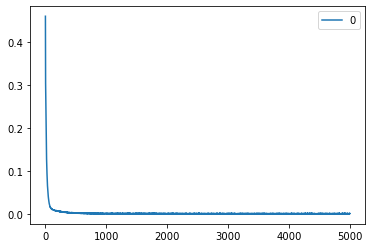

In [36]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(val_metric).plot()

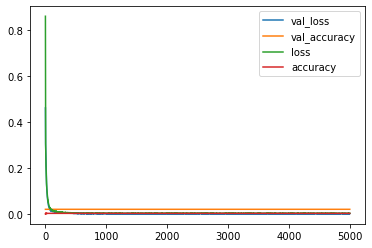

In [37]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

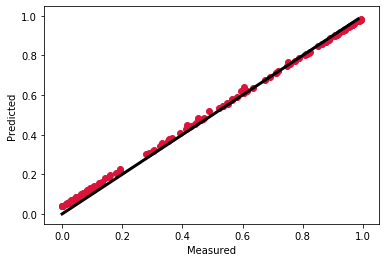

In [38]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

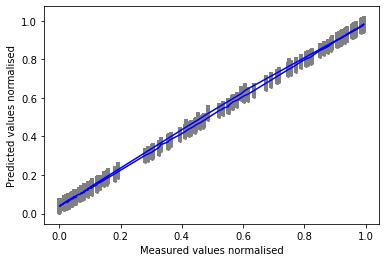

In [39]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [40]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [43]:
y_pred_unscaled = pd.DataFrame(y_pred_unscaled)


In [44]:
y_test_unscaled = pd.DataFrame(y_test_unscaled)

In [45]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad98198f10>)

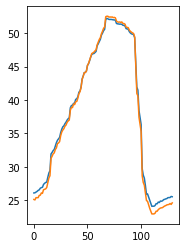

In [46]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotyhat_ytest(df_yhat, y_test, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    #df = df.iloc[:, 3:]
    for i in range (0, df_yhat.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df_yhat.index, df_yhat.iloc[:, i],\
                label = 'Layer ' + str(i))
        ax.plot(y_test.index, y_test.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotyhat_ytest(y_pred_unscaled,y_test_unscaled, ax, fig, alpha =0.7, scm=None)